<a href="https://colab.research.google.com/github/Vinicius-Ikehara/Projetos-Machine-Learning/blob/main/Loja_de_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOJA DE ROUPAS**

A loja possui um site que vende 10 tipos de produtos





**NOSSO TRABALHO É:** automatizar essa classificação de maneira que
quando um novo produto for cadastrado no site, ele já saiba exatamente de qual tipo de produto ele é.

**Baixando o conjunto de imagens com o keras**

In [ ]:
#Imports
import tensorflow #Biblioteca pai
from tensorflow import keras #Keras é uma sub biblioteca dentro do tensorflow
import matplotlib.pyplot as plt #Biblioteca de visualização

dataset = keras.datasets.fashion_mnist # baixando nosso dataset

#A função load_data retorna dois conjuntos de dados que não sofrem alteração, 
#Vamos então atribuir o primeiro conjunto aos dados de imagens de treino
#O segundo conjunto aos dados de imagem de teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [ ]:
#Entendendo nossos dados
print(len(imagens_treino), imagens_treino.shape) #60000 imagens
print(len(imagens_teste), imagens_teste.shape) #10000 imagens
#Arrays de 28 linhas e 28 colunas

60000 (60000, 28, 28)
10000 (10000, 28, 28)
10000


0

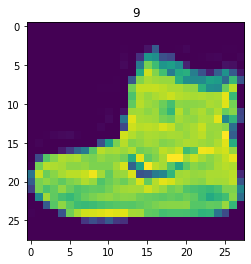

In [ ]:
#Vamos visualizar uma imagem para entender com o que estamos trabalhando
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
#Repare que a label é um numero, número 9 e não uma palavra

In [ ]:
#Vimos que nosso vetor de labels identificadoras temos números, vamos então ver quantos numeros
#temos para saber quantas classificações existem dentro dessa loja
print(identificacoes_treino.min())
print(identificacoes_treino.max())
#Agora sabemos que temos 10 classificações

0
9


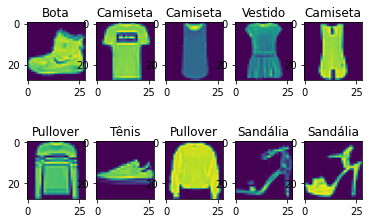

In [ ]:
total_de_classificacoes = 10

#Nossas labels são numeros, podemos agora criar um vetor de nomes para determinar os tipos de produtos
nomes_de_classificacoes = ['Camiseta','Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

#Foram postadas 10 imagens
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

**Criando nossas Camadas**

Nossas imagens tinham 28 linhas e 28 colunas
Então o input_shape será 28,28

In [ ]:
#Criando a Camada 0
#modelo = keras.Sequential([
  #keras.layers.Flatten(input_shape=(28,28)), #O Flatten vai achatar tudo em um único array
  #Criando a Camada 1
    #Como ajustar o número? Depende! Vamos colocar um numero aleatório que seja múltiplo de 2
    #Também é importante dizer quando essas bolinhas serão ativadas
    #Activation vai receber a função ReLu pois é uma bem convencional
  #keras.layers.Dense(256,activation = tensorflow.nn.relu),
    #A ReLU torna que todos os números negativos virem 0
    #E os números positivos sejam mantidos iguais 
    #A ReLU é uma função não Linear  
  #Criando a Camada 2
  #keras.layers.Dense(10,activation = tensorflow.nn.softmax)
  #])

In [ ]:
#Código construção do modelo sem comentários
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

**TREINANDO NOSSO MODELO**

In [ ]:
#Antes de treinar é necessário compilar nosso modelo
#Msg Erro: Use model.compile(optimizer, loss)`.
#Vamos usar o adam como optmizer e a loss como entropia categorica cruzada esparsa
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino, steps_per_epoch=60000)

60000/60000 [==============================] - 127s 2ms/step - loss: 1.6753


**O que podemos alterar para que nosso modelo tenha uma taxa de erro ainda menor?**

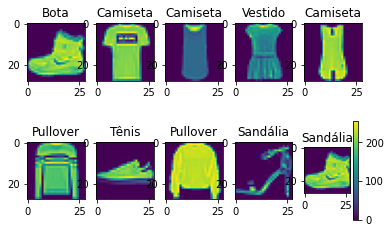

In [ ]:
#Vamos explorar ainda mais nossas imagens
plt.imshow(imagens_treino[0])
plt.colorbar()

#Reparem que temos entre vários tons de cores
#Nesse caso são 0 a 255

In [ ]:
#E se ao invés 0,1,2,3,4,...254,255 nós tivéssemos valores entre 0 e 1
#Para isso podemos usar valores de ponto flutuante
#Como temos valores até 255 então 
#255/255 = 1 representa o máximo, e 0/255 = 0 representa o mínimo

In [ ]:
imagens_treino = imagens_treino/float(255) # Processo de normalização
#É importante separar a célula da normalização da célula de treino do modelo

In [ ]:
#Treinando o modelo novamente
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino, steps_per_epoch=60000)

60000/60000 [==============================] - 128s 2ms/step - loss: 0.5090


REPAREM QUE NOSSA PERDA DIMINUI MUITO DE 1.3 PARA 0.5

**Parte 2 O que podemos alterar para que nosso modelo tenha uma taxa de erro ainda menor?**

E se adicionarmos mais camadas intermediárias?

In [ ]:
#Treinando o modelo novamente
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino, steps_per_epoch=60000)

60000/60000 [==============================] - 189s 3ms/step - loss: 0.5547


Tempo aumentou e nossa taxa de perda também, então para esse caso não compensa adicionar mais camadas intermediárias. Retomaremos do nosso modelo com apenas 3 camadas

**É MUITO IMPORTANTE RESETAR O NOTEBOOK PARA NÃO TER PROBLEMAS NA HORA DE COMPILAR NOSSOS DADOS**

In [ ]:
#Retomando nosso modelo com melhor resultado
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

historico = modelo.fit(imagens_treino, identificacoes_treino,steps_per_epoch = (len(imagens_treino)*0.8), epochs=5,validation_split=0.2)

Epoch 1/5
48000/48000 [==============================] - 125s 3ms/step - loss: 0.3083 - accuracy: 0.8973 - val_loss: 0.4624 - val_accuracy: 0.8791
Epoch 2/5
48000/48000 [==============================] - 114s 2ms/step - loss: 0.3062 - accuracy: 0.8992 - val_loss: 0.4730 - val_accuracy: 0.8829
Epoch 3/5
48000/48000 [==============================] - 115s 2ms/step - loss: 0.3029 - accuracy: 0.8981 - val_loss: 0.5083 - val_accuracy: 0.8695
Epoch 4/5
48000/48000 [==============================] - 109s 2ms/step - loss: 0.3019 - accuracy: 0.8970 - val_loss: 0.5900 - val_accuracy: 0.8746
Epoch 5/5
48000/48000 [==============================] - 107s 2ms/step - loss: 0.3059 - accuracy: 0.8988 - val_loss: 0.5039 - val_accuracy: 0.8721


In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

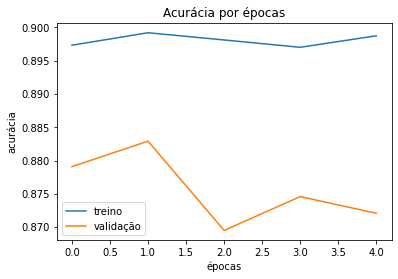

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

**Vamos testar o modelo**

In [ ]:
testes = modelo.predict(imagens_teste)

testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Analisando o Predict** 

O predict nos retornou para cada imagem um vetor com 10 valores

In [ ]:
import numpy as np

testes = modelo.predict(imagens_teste)

print("Resultado teste:", np.argmax(testes[0]))
print("Numero da Imagem de teste", identificacoes_teste[0])

print("Resultado teste:", np.argmax(testes[2]))
print("Numero da Imagem de teste", identificacoes_teste[2])

Resultado teste: 9
Numero da Imagem de teste 9
Resultado teste: 1
Numero da Imagem de teste 1


**Avaliando o modelo**

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 112.4468 - accuracy: 0.8453
Perda do teste: 112.44677734375
Acurácia do teste: 0.845300018787384
